In [ ]:
!pip install yfinance

In [ ]:
!pip install tensorflow

In [ ]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29411 sha256=798b7f49def836f405ee50e89499b4d54cb631880a51d7530750050bf4efd743
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [ ]:
!pip install matplotlib

In [ ]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import ta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import tensorflow as tf

In [ ]:
from datetime import datetime, timedelta
end = datetime.now()
start = datetime(end.year-5, end.month, end.day)
data = yf.download('GOOD', start, end)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-07-15,21.420000,21.549999,21.320000,21.379999,14.220485,81300
2019-07-16,21.379999,21.490000,21.200001,21.379999,14.220485,77600
2019-07-17,21.490000,21.520000,21.200001,21.330000,14.187228,87200
2019-07-18,21.370001,21.490000,21.200001,21.430000,14.253742,73100
2019-07-19,21.260000,21.320000,20.980000,21.000000,14.049687,84800


In [ ]:
# Visualize the data
def visualize_data(data, column):
  plt.figure(figsize=(14, 7))
  plt.title(f'{column} Stock Price History')
  plt.plot(data[column], label=column)
  plt.xlabel('Year')
  plt.ylabel(f'{column} Price USD ($)')
  plt.show()

In [ ]:
# Tính các đặc tính bổ sung ROC, RSI, MA
data['ROC'] = data['Close'].pct_change(periods=1)
data['RSI'] = ta.momentum.rsi(data['Close'], window=14)
data['Moving_Average'] = data['Close'].rolling(window=14).mean()
data = data.dropna()

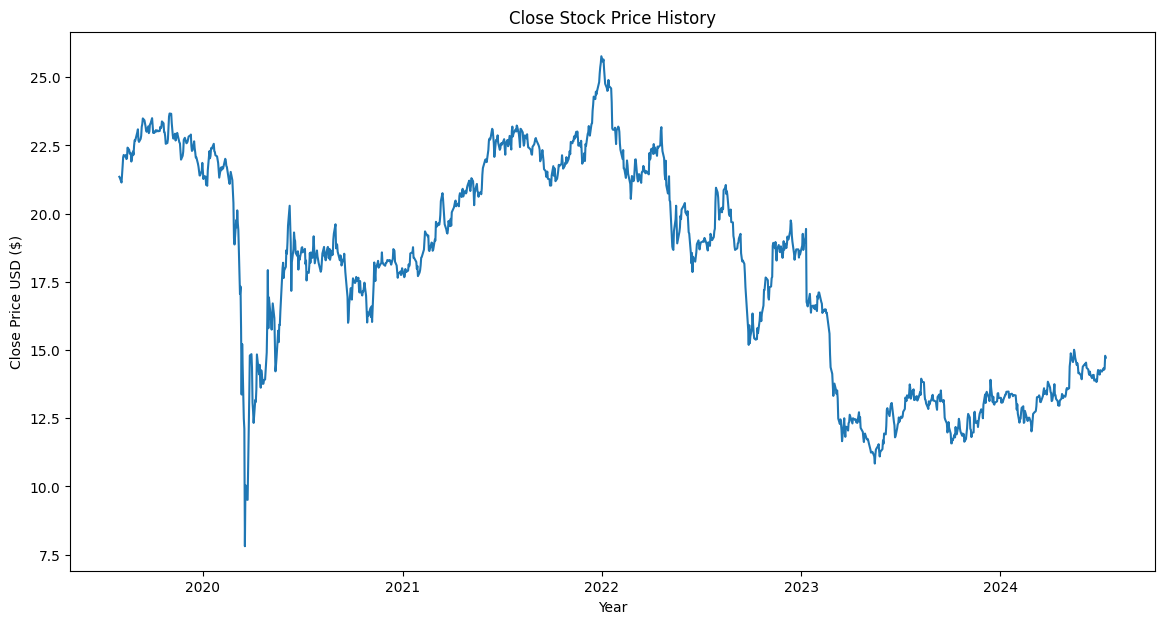

In [ ]:
visualize_data(data, 'Close')

In [ ]:
def preprocess_data(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    return scaled_data, scaler

In [ ]:
# Create training and testing datasets
def create_datasets(data, target_column, look_back=60):
    x, y = [], []
    for i in range(look_back, len(data)):
        x.append(data[i-look_back:i, :])
        y.append(data[i, target_column])  # predicting the target_column (Close price, ROC, etc.)
    return np.array(x), np.array(y)

,Open,High,Low,Close,Adj Close,Volume,ROC,RSI,Moving_Average
Date,,,,,,,,,
2019-08-01,21.299999,21.559999,21.290001,21.350000,14.283851,104700,0.004233,52.323390,21.255714
2019-08-02,21.299999,21.420000,21.150000,21.309999,14.257089,203200,-0.001874,50.389612,21.250714
2019-08-05,21.170000,21.360001,20.900000,21.139999,14.143351,159700,-0.007977,43.099316,21.233571
2019-08-06,21.129999,21.510000,21.129999,21.420000,14.330683,87800,0.013245,54.719436,21.240000
2019-08-07,21.400000,21.830000,21.280001,21.740000,14.544770,209000,0.014939,63.814451,21.262143
...,...,...,...,...,...,...,...,...,...
2024-07-08,14.220000,14.330000,14.220000,14.330000,14.330000,210900,0.008445,55.976542,14.083572
2024-07-09,14.290000,14.320000,14.130000,14.280000,14.280000,187500,-0.003489,54.169396,14.105714
2024-07-10,14.280000,14.350000,14.160000,14.310000,14.310000,180900,0.002101,55.105923,14.122143


In [ ]:
scaled_data, scaler = preprocess_data(data)

In [ ]:
target_column = 'ROC'
target_column_index = data.columns.get_loc(target_column)

In [ ]:
data[target_column]

Date
2019-08-01    0.004233
2019-08-02   -0.001874
2019-08-05   -0.007977
2019-08-06    0.013245
2019-08-07    0.014939
                ...   
2024-07-08    0.008445
2024-07-09   -0.003489
2024-07-10    0.002101
2024-07-11    0.033543
2024-07-12   -0.004733
Name: ROC, Length: 1245, dtype: float64

In [ ]:
x, y = create_datasets(scaled_data, target_column_index)

array([[[0.74901734, 0.7154421 , 0.76111115, ..., 0.55977131,
         0.57886084, 0.7221248 ],
        [0.74901734, 0.70672483, 0.7533333 , ..., 0.55025739,
         0.55026109, 0.72176379],
        [0.74171812, 0.70298887, 0.73944441, ..., 0.54074814,
         0.44244076, 0.72052604],
        ...,
        [0.86636715, 0.83561647, 0.85499997, ..., 0.53178941,
         0.51767913, 0.8549252 ],
        [0.84446938, 0.81070989, 0.84499995, ..., 0.55249858,
         0.51327602, 0.85477048],
        [0.84839974, 0.80946454, 0.84555552, ..., 0.54300721,
         0.44900456, 0.85410004]],

       [[0.74901734, 0.70672483, 0.7533333 , ..., 0.55025739,
         0.55026109, 0.72176379],
        [0.74171812, 0.70298887, 0.73944441, ..., 0.54074814,
         0.44244076, 0.72052604],
        [0.73947214, 0.71232882, 0.75222217, ..., 0.57381071,
         0.61429733, 0.7209902 ],
        ...,
        [0.84446938, 0.81070989, 0.84499995, ..., 0.55249858,
         0.51327602, 0.85477048],
        [0.8

In [ ]:
x_train, x_test = x[:int(len(x)*0.8)], x[int(len(x)*0.8):]
y_train, y_test = y[:int(len(y)*0.8)], y[int(len(y)*0.8):]

In [ ]:
# Build and train the LSTM model
def build_and_train_model(x_train, y_train, epochs=100, batch_size=32):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
    model.add(LSTM(units=50))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
    return model

In [ ]:
model = build_and_train_model(x_train, y_train)

Epoch 1/100
31/31 [==============================] - 6s 12ms/step - loss: 0.0623
Epoch 2/100
31/31 [==============================] - 0s 13ms/step - loss: 0.0039
Epoch 3/100
31/31 [==============================] - 1s 18ms/step - loss: 0.0019
Epoch 4/100
31/31 [==============================] - 1s 21ms/step - loss: 0.0014
Epoch 5/100
31/31 [==============================] - 0s 14ms/step - loss: 0.0014
Epoch 6/100
31/31 [==============================] - 0s 15ms/step - loss: 0.0013
Epoch 7/100
31/31 [==============================] - 0s 15ms/step - loss: 0.0013
Epoch 8/100
31/31 [==============================] - 0s 15ms/step - loss: 0.0013
Epoch 9/100
31/31 [==============================] - 0s 15ms/step - loss: 0.0012
Epoch 10/100
31/31 [==============================] - 0s 15ms/step - loss: 0.0012
Epoch 11/100
31/31 [==============================] - 1s 17ms/step - loss: 0.0012
Epoch 12/100
31/31 [==============================] - 1s 16ms/step - loss: 0.0011
Epoch 13/100
31/31 [=====

In [ ]:
predictions = model.predict(x_test)

8/8 [==============================] - 1s 6ms/step


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
inv_predictions = scaler.fit_transform(predictions)
inv_predictions = scaler.inverse_transform(predictions)

In [ ]:
inv_predictions.shape

(248, 1)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
inv_test = scaler.fit_transform(y_test.reshape(-1, 1)) # Reshape y_test to a 2D array
inv_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
inv_test.shape

(248, 1)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def calculate_accuracy(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

In [ ]:
print(calculate_accuracy(inv_test, inv_predictions))

(2.8286375065015737e-06, 0.0013601621104246979, 0.9575295686865453)


In [ ]:
int(len(x)*0.8)

948

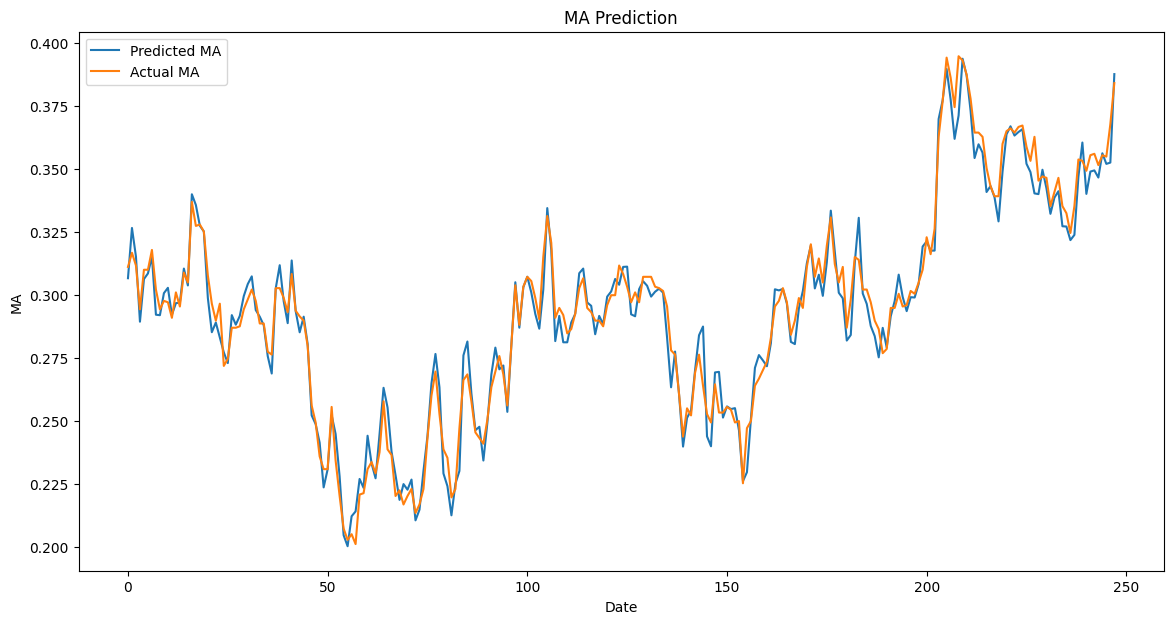

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(predictions, label='Predicted MA')
plt.plot(y_test, label='Actual MA')
plt.xlabel('Date')
plt.ylabel('MA')
plt.title('MA Prediction')
plt.legend(loc='upper left')
plt.show()

In [ ]:
def run_main(target_column):
  target_column_index = data.columns.get_loc(target_column)
  x, y = create_datasets(scaled_data, target_column_index)

  x_train, x_test = x[:int(len(x)*0.8)], x[int(len(x)*0.8):]
  y_train, y_test = y[:int(len(y)*0.8)], y[int(len(y)*0.8):]

  model = build_and_train_model(x_train, y_train)
  predictions = model.predict(x_test)

  scaler = MinMaxScaler(feature_range=(0, 1))
  inv_predictions = scaler.fit_transform(predictions)
  inv_predictions = scaler.inverse_transform(predictions)
  inv_test = scaler.fit_transform(y_test.reshape(-1, 1)) # Reshape y_test to a 2D array
  inv_test = scaler.inverse_transform(y_test.reshape(-1, 1))

  plt.figure(figsize=(14, 7))
  plt.plot(predictions, label='Predicted MA')
  plt.plot(y_test, label='Actual MA')
  plt.xlabel('Date')
  plt.ylabel('MA')
  plt.title('MA Prediction')
  plt.legend(loc='upper left')
  plt.show()

Epoch 1/100
30/30 [==============================] - 8s 99ms/step - loss: 0.0444
Epoch 2/100
30/30 [==============================] - 3s 102ms/step - loss: 0.0033
Epoch 3/100
30/30 [==============================] - 2s 62ms/step - loss: 0.0022
Epoch 4/100
30/30 [==============================] - 2s 62ms/step - loss: 0.0021
Epoch 5/100
30/30 [==============================] - 2s 72ms/step - loss: 0.0020
Epoch 6/100
30/30 [==============================] - 2s 67ms/step - loss: 0.0021
Epoch 7/100
30/30 [==============================] - 2s 68ms/step - loss: 0.0021
Epoch 8/100
30/30 [==============================] - 3s 99ms/step - loss: 0.0020
Epoch 9/100
30/30 [==============================] - 3s 102ms/step - loss: 0.0020
Epoch 10/100
30/30 [==============================] - 2s 64ms/step - loss: 0.0020
Epoch 11/100
30/30 [==============================] - 2s 62ms/step - loss: 0.0021
Epoch 12/100
30/30 [==============================] - 2s 72ms/step - loss: 0.0021
Epoch 13/100
30/30 [===

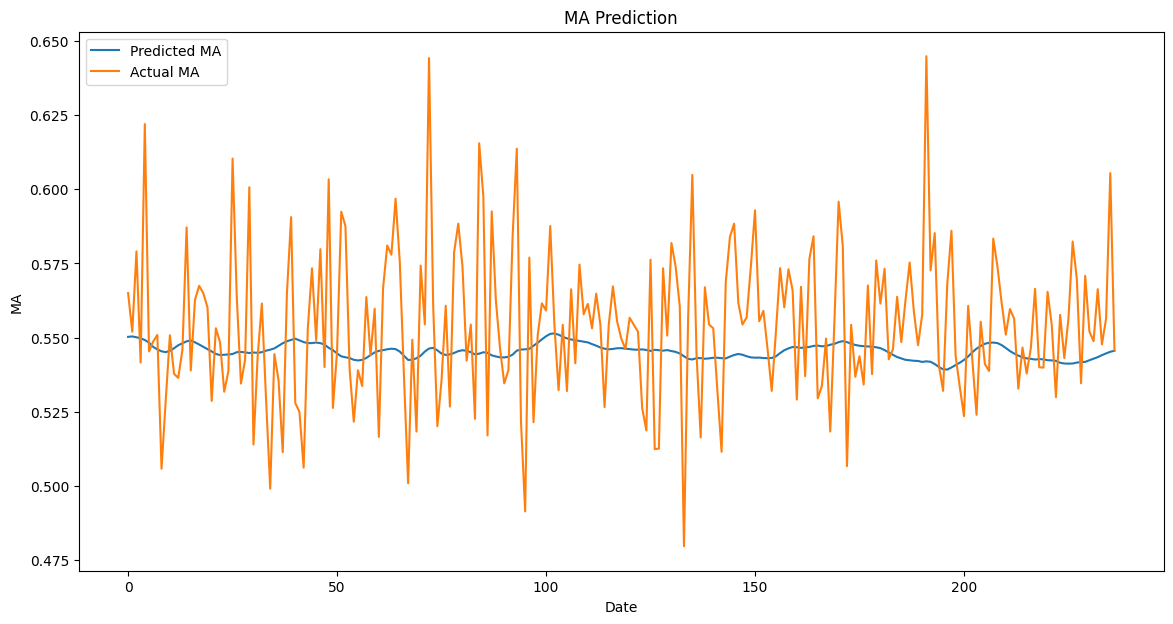

In [ ]:
run_main("ROC")

Epoch 1/100
30/30 [==============================] - 6s 61ms/step - loss: 0.0356
Epoch 2/100
30/30 [==============================] - 2s 66ms/step - loss: 0.0042
Epoch 3/100
30/30 [==============================] - 3s 85ms/step - loss: 0.0030
Epoch 4/100
30/30 [==============================] - 3s 103ms/step - loss: 0.0025
Epoch 5/100
30/30 [==============================] - 3s 113ms/step - loss: 0.0023
Epoch 6/100
30/30 [==============================] - 3s 96ms/step - loss: 0.0021
Epoch 7/100
30/30 [==============================] - 2s 63ms/step - loss: 0.0020
Epoch 8/100
30/30 [==============================] - 2s 62ms/step - loss: 0.0019
Epoch 9/100
30/30 [==============================] - 2s 74ms/step - loss: 0.0017
Epoch 10/100
30/30 [==============================] - 3s 96ms/step - loss: 0.0017
Epoch 11/100
30/30 [==============================] - 3s 88ms/step - loss: 0.0016
Epoch 12/100
30/30 [==============================] - 2s 69ms/step - loss: 0.0015
Epoch 13/100
30/30 [===

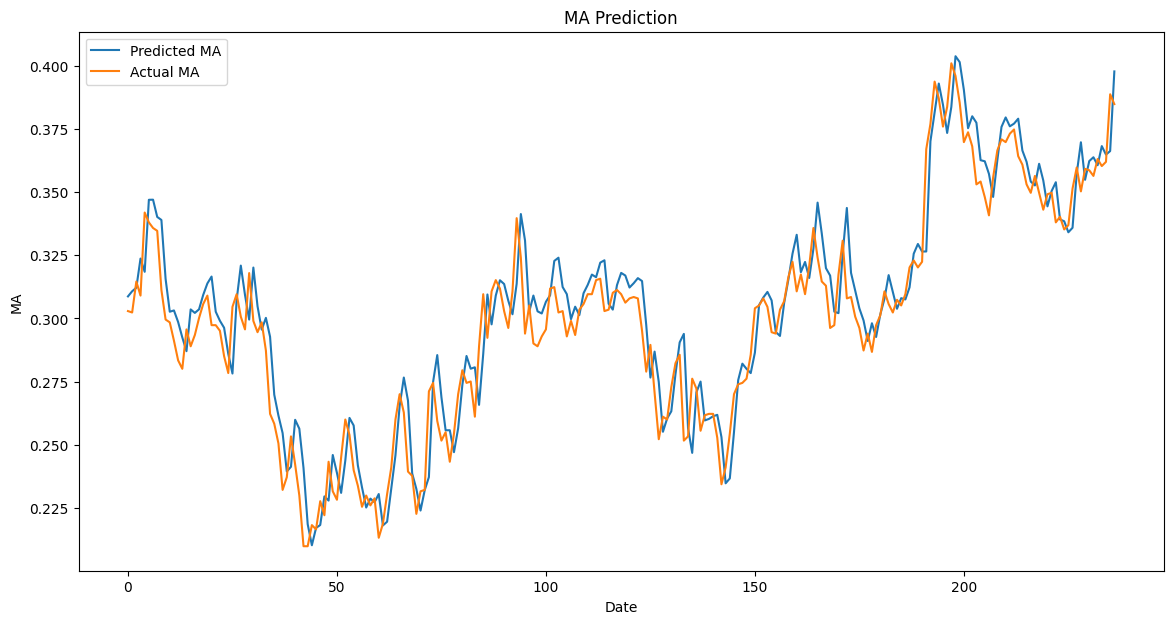

In [ ]:
run_main("Close")